In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import uniform
%matplotlib inline


def get_dist(n):
    return np.random.uniform(0, 1, n)


def get_stats(dist):
    n = len(dist)
    m = np.sum(dist) / n
    d = np.sum((dist - m)**2) / n
    s = d**0.5
    return m, d, s


def show_stats(m, d, s):
    theor_m = 0.5
    theor_d = 1/12
    theor_s = theor_d**0.5

    print('%f - theoretical M, %f - calculated M' % (theor_m, m))
    print('%f - theoretical D, %f - calculated D' % (theor_d, d))
    print('%f - theoretical s, %f - calculated s' % (theor_s, s))


def K(u, m, f):
    k = np.sum([(u[i] - m) * (u[i+f] - m) for i in range(len(u)-f)])
    k /= np.sum((u - m)**2)

    return k

In [3]:
def plot_k(n):
    dist = get_dist(n)
    m, d, s = get_stats(dist)
    f = n
    k = np.array([K(dist, m, i) for i in range(1, f + 2)])

    plt.plot(k)
    plt.grid(True)
    plt.show()

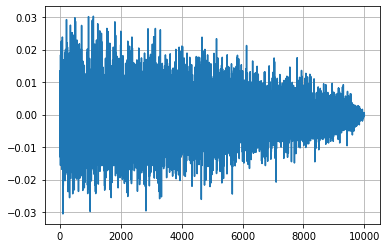

In [21]:
plot_k(10000)

In [5]:
def plot_pdf(n):
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
    ax.plot(x, uniform.pdf(x),'g-', lw=3)
    dist = get_dist(n)
    ax.hist(dist, density=True, bins=20)
    ax.grid(True)
    plt.show()

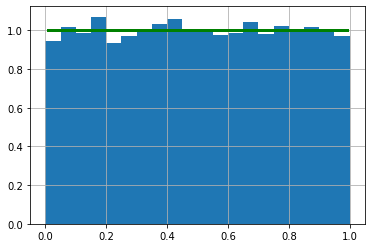

In [6]:
plot_pdf(10000)

In [7]:
def plot_cdf(n):
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
    ax.plot(x, uniform.cdf(x),'g-', lw=3)
    dist = get_dist(n)
    ax.hist(dist, density=True, cumulative=True, bins=len(dist))
    ax.grid(True)
    plt.show()

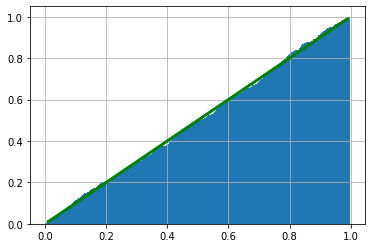

In [8]:
plot_cdf(1000)

In [9]:
def get_data(n):
    dist = get_dist(n)
    m, d, s = get_stats(dist)
    m_theor, d_theor = 0.5, 1/12
    m_diff, d_diff = m - m_theor, d - d_theor
    
    return [n, m, m_theor, m_diff, d, d_theor, d_diff]

In [10]:
import pandas as pd

data = [get_data(10**i) for i in range(1, 5)]
headers = ['n', 'm', 'm_theor', 'm_diff', 'd', 'd_theor', 'd_diff']

pd.DataFrame(data, columns=headers)

,n,m,m_theor,m_diff,d,d_theor,d_diff
0,10,0.501138,0.5,0.001138,0.108111,0.083333,0.024778
1,100,0.502516,0.5,0.002516,0.070165,0.083333,-0.013168
2,1000,0.504197,0.5,0.004197,0.082705,0.083333,-0.000628
3,10000,0.498876,0.5,-0.001124,0.082267,0.083333,-0.001066
